<a href="https://colab.research.google.com/github/webjjang/data_anal/blob/main/ch05_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown
gdown.download("https://bit.ly/3pK7iuu","ns_book7.csv",quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 117MB/s]


'ns_book7.csv'

In [2]:
import pandas as pd
ns_book7 = pd.read_csv("ns_book7.csv", low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [5]:
# 발행년도 별 발간 도서의 갯수 k=발행년도, v = 갯수
count_by_year = ns_book7["발행년도"].value_counts()
count_by_year

,count
발행년도,
2012,18601
2014,17797
2009,17611
2011,17523
2010,17503
...,...
2548,1
1948,1
1967,1


In [9]:
# 타입 출력 - pandas.core.series.Series : 데이터프레임의 테이블 구조형식
# print(type(count_by_year))
# 인덱스로 정렬시킨다.
count_by_year = count_by_year.sort_index()
count_by_year

,count
발행년도,
1947,1
1948,1
1949,1
1952,11
1954,1
...,...
2551,1
2552,2
2559,1


In [10]:
count_by_year = count_by_year[count_by_year.index <= 2025]
count_by_year

,count
발행년도,
1947,1
1948,1
1949,1
1952,11
1954,1
...,...
2018,16423
2019,15220
2020,11834


In [12]:
ns_book7.head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [34]:
import numpy as np

def kdc_1st_char(no):
  # 000 총류 ~ 900 역사 -> 맨 앞자리가 큰분류에 해당된다.
  if no is np.nan:
    return -1
  else:
    return no[0] # 큰분류 에 해당되는 맨 앞자리 데이터

count_by_subject = ns_book7["주제분류번호"].apply(kdc_1st_char).value_counts()
count_by_subject

,count
주제분류번호,
8,108643
3,80767
5,40916
9,26375
6,25070
1,22647
-1,16978
7,15836
4,13688


In [35]:
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100

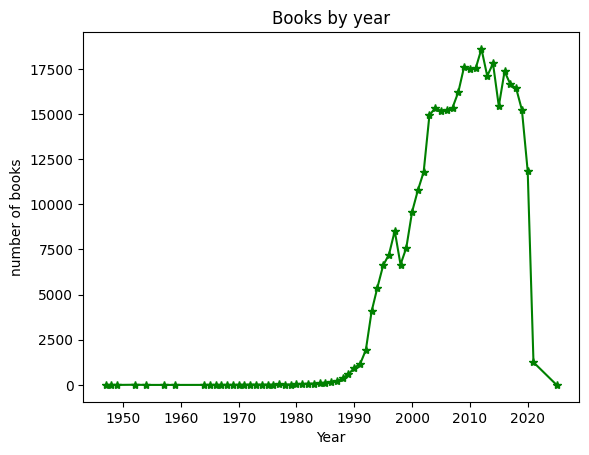

In [53]:
# plot() - 선 그래프
# plt.plot(count_by_year.index, count_by_year.values) # 기본 선 그래프
#  marker="." : 없음 -> . , linestyle=":" : 실선 -> 점선, color="색상" : 색상이름, 색상표 16진수
# plt.plot(count_by_year, marker=".", linestyle=":", color="red")
# linestyle - 기본은 실선 "-", 점선 ":"
plt.plot(count_by_year, "*-g")
plt.title("Books by year")
plt.xlabel("Year")
plt.ylabel("number of books")
plt.show()

In [25]:
print(ns_book7["주제분류번호"].dtypes)

object


In [29]:
ns_book7.describe()

,번호,발행년도,도서권수,대출건수
count,376770.000000,376770.000000,376770.000000,376770.000000
mean,202977.476649,2008.460076,1.145540,11.593439
std,115298.245784,8.773148,0.473853,19.279409
min,1.000000,1947.000000,1.000000,0.000000
25%,104488.250000,2003.000000,1.000000,2.000000
50%,204550.500000,2009.000000,1.000000,6.000000
75%,302346.750000,2015.000000,1.000000,14.000000
max,401681.000000,2650.000000,40.000000,1765.000000


In [33]:
ns_book7["주제분류번호"].dropna().astype(str).str.len().max()

12